<a href="https://colab.research.google.com/github/haining-b/The_Easy_Text_Analyzer/blob/master/The_Easy_Text_Analyzer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction to The Easy Text Analyser
**Welcome to The Easy Text Analyser: Here for all your 
thematic analysis needs.**


---



 This document will walk you through the analysis of 
 your text of interest, and will hopefully make
 the process of editing slightly more bearable. 


 As you read, please pay attention to any text that 
 looks like 

         # this: 



 that's a *comment* and it's here 
 to make this whole thing comprehensible
 and EASY
 even if you've never touched code before in your life. 


 If you see:


        ##################################################
        ########### YOUR INPUT REQUIRED HERE #############
        ##################################################


 you absolutely MUST change the lines of code that 
 follow. Those lines are the ones doing a lot of 
 the work, and they depend upon your specific text.


  I'll refer to each of these little boxes as a cell.
 To run a cell (on a Mac, anyways), press option + enter.
 You'll need to run most of the cells.


Optional cells are labeled and hidden for simplicity's
 sake. Some of the function cells are also hidden - 
 that's so you don't accidently change anything.
Cells labeled 'Touchy' need you to change their contents. Cells labeled 'No Touchy' should be left alone, but do run them. If you want to see the inside of a hidden cell, 
 double click on the title. 


 Happy editing!


# Modules and installations 

These are just some tools we're going to use later. Run the following cell as described above (option + enter), but no touchy! 

In [19]:
#@title Modules and installations  (No Touchy) { form-width: "200px" }

%pip install pdfkit



%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk import Text,WordNetLemmatizer, sent_tokenize, word_tokenize

import csv

from string import punctuation
from collections import Counter

from itertools import chain
import string
import pdfkit
import re

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Stop Words

'Stop words' are words that aren't interesting for analysis purposes. I don't care how often I said 'and' or 'says', for example. The following cell loads a list of English stop words. You can change the list in the cells following that (e.g. to add elements of a conlang).


The list of English stop words is as follows:

who, he, she, a, can, shan, doesn, ll, few, won, couldn, here, because, off, against, during, its, myself, him, was, d, didn, hasnt, their, thatll, only, just, me, weren, have, youve, such, ours, her, aren, doing, or, re, down, shant, hasn, below, up, above, neednt, hers, mightn, will, wont, those, while, himself, wouldn, has, they, did, at, after, y, more, werent, if, any, each, o, be, to, we, ve, all, t, isnt, mustn, hadn, were, further, its, over, didnt, dont, wouldnt, is, same, it, whom, both, m, but, needn, these, should, in, doesnt, been, shouldn, i, does, yourselves, there, wasnt, had, other, own, do, haven, this, couldnt, wasn, don, as, youre, no, shouldve, about, now, having, an, too, with, where, youll, herself, what, from, isn, before, between, ourselves, on, for, when, being, out, through, nor, yourself, itself, so, ain, mustnt, you, my, some, arent, youd, our, the, into, under, and, by, yours, shouldnt, ma, again, how, not, his, themselves, why, them, am, are, than, until, then, mightnt, havent, of, your, theirs, very, s, most, shes, once, hadnt, that, which

The words are truncated (like, 'ain' instead of "ain't") due to the method of analysis that we use later on.

I can easily imagine a situation in which you might want to analyse use of words like "should" or "ain't" (When and where is my character prescriptive? Did my southern character suddenly lose their accent in chapter 16?). To handle these exceptions, the cell below titled "Optional Stopword Deleter" will allow you to remove words from this list, and thereby analyze your text based on those words.

The Expander cell does the reverse - If you use the neo pronoun "ze", for example, you might not want to know every time that it occurs in your text. This cell will probably be less useful to you, because stop words are more of a problem when you are analyzing a huge body of text - for our purposes, it probably won't take that much more computational power to just include them. 

In [14]:
#@title Loading stop words (No Touchy) { form-width: "200px" }


from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))
inclusive_stop_words = [i for i in stop_words]

In [15]:
#@title Stop Word Deleter (OPTIONAL) { form-width: "200px" }

####### OPTIONAL CELL #######
# I am interested in the genderedness of my text, so I'm keeping gendered pronouns.
# You can do this with any stop word; just insert the one you would like to keep into the
# list 'words_to_keep'.
# E.g. words_to_keep = ('it',"it\'s",'is')
# Note: the backslash in it\'s is so that the computer treats the apostrophe as a character 
# and not a code thing. You MUST include the backslash when handling apostrophes or 
# you'll confuse the computer.
# If something goes wrong here, that is probably the issue.

words_to_keep = ('he','her','she','hers','herself', 'him', 'himself', 'his',"she\'s")

inclusive_stop_words = [i for i in inclusive_stop_words if not i in words_to_keep]


In [ ]:
#@title Stop Word Expander (OPTIONAL) { form-width: "200px" }
# To ADD a stop word, simply run the following code (with the appropriate word 
# included (i.e. not 'haining')).

inclusive_stop_words.append('haining')


# Punctuation

Punctuation can cause a lot of trouble in text analysis. That's because the addition of a single punctuation mark that abuts a word can change what the computer sees as a "word". In this case, that would make word and "word" different words, which is clearly not accurate. Hence, this punctuation removal function.

In [131]:
#@title Punctuation removal function (No Touchy) { form-width: "200px" }
# This function removes all punctuation from your text. 
# Originally found here: https://github.com/davidmcclure/textplot/blob/master/textplot/text.py
# I do occasionally find that some weird punctuation has made its way into my text,
# so if you are seeing an object escape consistently, copy and paste it into the long string
# of nonsense below (what's actually happening is that you're replacing the punctuation, 
# like '.', with nothing, like ''. The marks '' just indicate what kind of thing you're 
# working with - here, it means text (as opposed to numbers, for example)).

def remove_punctuation(text):
    """
    Removes all punctuation and conotation from the string and returns a 'plain' string
    """
    punctuation2 = '-&—®©™€â´‚+³©¥ã¼•ž®è±äüöž!@#Â“§$%^*()î_+€$=¿{”}[]:«;"»\â¢|<>,.?/~`0123456789’'
    for sign in punctuation2:
        text = text.replace(sign, "")
    return text



# Your file

For starters, we'll be working with Jane Austen's Pride and Prejudice. The .txt file for P&P is on my github at https://github.com/haining-b/The_Easy_Text_Analyzer/blob/6ddbb85c6b6eff15b5941241408bca3f4c6f2882/pride_and_prejudice.txt. You can also download it at Project Gutenberg: https://www.gutenberg.org/files/1342/1342-0.txt. You will eventually need to edit these cells to reflect your text of interest. 

In [6]:
#@title Upload your file (Touchy) { form-width: "200px" }

# Here is where you will choose the file to upload.
# File should be a plaintext .txt file

##################################################
############ YOUR INPUT REQUIRED HERE ############
##################################################
from google.colab import files
uploaded = files.upload()

Saving pride_and_prejudice.txt to pride_and_prejudice.txt


In [132]:
#@title Slight modifications to your file (Touchy) { form-width: "200px" }

# Get the full text of your file without punctuation
# Replace 'pride_and_prejudice.txt' with the name of the file you uploaded above.

##################################################
############ YOUR INPUT REQUIRED HERE ############
##################################################

with open('pride_and_prejudice.txt', 'r', errors='replace') as f:
            words_subbed = f.read()


#Dealing with multiple definitions (OPTIONAL)
In the book I've written, I have a character whose name is Will. Because that name is also a noun and a modal verb, I need to take all the times that 'Will' occurs in the text and turn it into something else, like the made-up word 'bobo'. This change is important, as capitalization is ignored by later processing steps. That's just so we don't go around acting like 'Almost' and 'almost' are 2 different words. The following little cell is just a glorified find and replace function (like in Microsoft Word).

For the purposes of illustration, I will be replacing the word 'Mrs. Bennet' with 'lala', since later steps will  
separate 'Mrs' from 'Bennet'.

In [134]:
#@title Multiple Definition Tool (OPTIONAL) { form-width: "200px" }

####### OPTIONAL CELL #######

# If you have a similar issue (a character named Hope, perhaps), just replace "Mrs. Bennet" 
# with "Hope", and all instances of "Hope" will become 'bobo'.

# If you want to do this multiple times, delete the '#' before the second line of code, 
# then substitute the appropriate terms. If you need EVEN MORE, then copy and paste 
# that SECOND line of code below the rest and do the replacement again. 
# If you use the first, you'll only replace one of the words you care about.

##################################################
############ YOUR INPUT REQUIRED HERE ############
##################################################

words_subbed = re.sub('Mrs Bennet','lala', words_subbed)

# words_subbed = re.sub('Hope','kikii', words_subbed)

# Tokenizing

Tokenizing test is a method of splitting any string of characters in a way that a native speaker of that language might do. For example, the computer does not know what a sentence or a word is. In order to treat your document appropriately, we need to teach the computer what we consider important units of information. Hence, tokenization.

For the most part, useful tokens include words. But you can imagine a situation in which multiple words are actually the unit on which we would like to perform analyses. Some examples include the White House, Pride and Prejudice, and Mr. Bingley. A default way of delineating tokens is to split based on spaces, but you can see that that would split the examples that I just mentioned into at least two different items. In the case of Mr. Bingley, this is quite problematic, as there are multiple Bingleys and many men in the novel Pride and Prejudice, and so you could not just search either "Mr." or "Bingley".

Multi Word Tokenizing is not dissimilar to what we did in the Multiple Definitions section. Indeed, you could also replace "Mr. Bingley" with a nonsense word.  However, the Multiple Definitions Tool will also handle identical spellings that are differentiated by case. *This* tool exclusively handles epithets. If I were using The Odyssey as an example, I would use the phrase 'rosy-fingered Dawn' to show off the use of Multi Word tokenizing, but unfortunately that type of repetition isn't really Jane Austen's style.


In the cell titled "Multi Word Tokens", we will make a list of the multiword tokens that we care about. In the cell titled "Tokenizer", we make a list of **all** of the tokenized words. 

In [135]:
#@title Multi Word Tokens (OPTIONAL) { form-width: "200px" }


# Note: we have already replaced all instances of Mrs. Bennet with 'lala', so the
# inclusion of her name is more for illustrative purposes than anything else.

##################################################
########### YOUR INPUT REQUIRED HERE #############
##################################################
epithets = [('Mrs.','Bennet'), ('Mr.','Bingley')]
epithets = [(x.lower(), y.lower()) for x,y in epithets]
epithets = [(remove_punctuation(x), remove_punctuation(y)) for x,y in epithets]

# epi_list lets us see the epithets we've made in a way that's easy 
# to copy and paste.
epi_list = [''.join(tups) for tups in epithets] 

In [145]:
#@title Looking at lists (OPTIONAL) { form-width: "200px" }


# Sometimes, it is useful to visualize the contents of a list. 
# For example, in the last cell I produced a list called epi_list. 
# This list is designed to allow you to view the multi word tokens 
# that you have added to your document. To look at any list,
# you can use the code below, edited to contain the name of the list. 
# Run this Cell to see what a list looks like. They have square brackets
# and the elements of the list are separated by a comma.

print(epi_list)

['mrsbennet', 'mrbingley']


In [139]:
#@title Tokenizer (No Touchy){ form-width: "200px" }

sent_tokenized = sent_tokenize(str(words_subbed))


# All words are made lowercase here: 
sent_tokenized = [i.lower() for i in sent_tokenized]

# Removing that punctuation (in case we missed anything earlier)
sent_tokenized = [remove_punctuation(i) for i in sent_tokenized]


# Ran if the user has specified epithets. 
if 'epithets' in globals():

  # Instantiating the tokenizer with our epithets
  MWEtokenizer_i = nltk.MWETokenizer(epithets, separator='')
  
  # Tokenizing the document
  with_multi_str=[MWEtokenizer_i.tokenize(word_tokenize(sent)) for sent in sent_tokenized]
  fully_tokenized = []
  for int_list in with_multi_str:
    for word in int_list:
      fully_tokenized.append(word)

# Removing stop words
  full_tokenization = [i for i in fully_tokenized if not i in inclusive_stop_words]

else:
  only_words = [word_tokenize(sent) for sent in sent_tokenized]
  fully_tokenized = []
  for int_list in only_words:
    for word in int_list:
      fully_tokenized.append(word)
  full_tokenization = [i for i in fully_tokenized if not i in inclusive_stop_words]



#Lemmatization

In this kind of analysis, we often talk about the 'stem' of a word. For many words, this is obvious - the stem of dogs is dog, of organizing is organiz, etc. Some words cannot be stemmed so easily - for example, the word 'best' is the superlative of good. Those two look 100% different. So some very smart people have developed an algorithm to *lemmatize* words. That is to say, the words are turned into their 'lemma'/ dictionary form. In the case of 'best', that is 'good'.

 We do this so that we capture appropriate units in our analysis - good and best mean pretty much the same thing, even if they are different in degree. 

Many words have multiple definitions, depending on their form. For example, sometime can mean 'at some point' or 'former'; sometime**s** means 'on more than one occasion'. Lemmatization does not therefore *neccesarily* collapse all instances of a given lemma into one. 

The following cell takes your big list of words and lemmatizes it. 

NOTE: This will probably not capture all lemmatizable words in scifi novels - if you made it up, it will likely throw a bit of a wrench into the analysis. That just means that words like 'bobo' and 'boboizes' are likely going to be categorized separately.



In [141]:
#@title Lemmatizer (No Touchy) { form-width: "200px" }

lemmatizer = WordNetLemmatizer()
words_lemmatized =[]
full_tokenization2 = full_tokenization[4000:4500]

# Lemmatizing the list
for word in full_tokenization2:
  words_lemmatized.append(lemmatizer.lemmatize(word))


words_lemmatized=[]

# Getting rid of words that are just "" as a result of removing punctuation.
for striing in words_l:
  if (striing != ""):
    words_lemmatized.append(striing)

        
words_lemmatized = np.asarray(words_lemmatized)


#Mapping the text

To plot word frequency over narrative time, we need to find all the points at which you've used a particular word. The following cell makes a list of all the unique words in your lemmatized document and then finds all the places they were used in the text. 

In [143]:
#@title Making the instance dictionary (No Touchy) { form-width: "200px" }

# Here we are making a 'dictionary'. 
# This will take longer depending on the size of your text doc and the breadth of 
# the used vocabulary.

# The point: we're going to keep track of every time those words appeared in the text.
# So we can type the word 'kid' into location_dictionary.get('kid') and see a complete list of kid 
# occurences. The values are 'position from the start'. 
# So in this sentence, the word 'the' has values of 5 and 7.

word_set = list(set(words_lemmatized))

location_dictionary = {}
for i in range(0,len(word_set)):
    key = word_set[i]
    indices = np.flatnonzero(words_lemmatized == key)
    location_dictionary.update( {key : indices} )
   

#Concept Compilation
 Okay, this one is SO USEFUL and actually what motivated me to do this in the first place. If you have a theme that can be represented by more than one word, what to do???? You could use this code to plot all of the terms at once, but that'll get clunky, fast. 
 
 So I give you the concept_compiler.
 
 
 This function takes a list of all the words you want to smoosh together into a concept and makes new 'terms'.

 The exciting thing about this is that it helps with editing big chunks of text. I wrote a book, then deleted the first quarter.... which is where many themes are introduced. In rewriting, I need to make sure the text has the right 'rhythm' - like, do I somehow go 200 pages before introducing a theme? Does this character appear frequently enough for people to remember and care about them? Some of that is squishier, certainly (like, you would definitely remember a person who commits a horrific murder and then vanishes for the rest of the book), but a picture never hurts!

In this case, I am going to combine nicknames for characters. Elizabeth is also known as Lizzy or Eliza. Mrs. Bennet is known as 'lala' (after we changed it in the multiple definitions step) and 'Mamma'. While there is certainly literary content inherent in a nickname, sometimes you just want to know when a person shows up.

In [146]:
#@title Concept Compiler (OPTIONAL; No Touchy) { form-width: "200px" }

def concept_compiler(terms):
    total_placement = []
    for i in terms:
        values = location_dictionary.get(i)
        values = values.tolist()
        total_placement.extend(values)
    return(total_placement)
        

In [26]:
#@title  Concept Compiler Example (OPTIONAL) { form-width: "200px" }

####### OPTIONAL CELL #######
# Remember! Keep your words lowercase, otherwise you won't find anything.

# If I wanted to do a concept like 'purple', I would delete the two lines of code 
# below and type:
# purple = concept_compiler(['purple','violet','lavendar','lilac','plum'])

##################################################
############ YOUR INPUT REQUIRED HERE ############
##################################################

elizabeth = concept_compiler(['elizabeth','eliza','lizzy'])
mrsbennet = concept_compiler(['mamma','lala'])

# The following code is just for labeling in the graph below.
# You'll want to change 'Elizabeth'/'Mrs. Bennet' to whatever you decided to call your concept
# For 'purple', the code is: purple.append('purple')


##################################################
########### YOUR INPUT REQUIRED HERE #############
##################################################
elizabeth.append('Elizabeth')
mrsbennet.append('Mrs. Bennet')


# Concept Storage (OPTIONAL) 

This cell is here for you to keep track of the contents of concepts that you have compiled. Double click to edit.

mrsbennet = ['mamma','lala']

elizabeth = ['elizabeth','eliza','lizzy']

# Graphing our work

We're at the end! Now is the time to graph your work! Below, I show you several ways to plot the data. 

In both examples, you are essentially running the line of code:
plot_word_freq(object_of_interest, strategy ,toplot)


object_of_interest is whatever you want to plot - a single word, a list of real words, a list of concepts.

strategy is the type of thing you gave in object_of_interest. It can be 'concept' or 'word'.
toplot is the type of plot you get out. There are a couple of options - a histogram or a line plot, or both! You can read more about them in the example cells below.


The pictures show the output, but you can doubleclick on the titles just like earlier to access the information and code inside.

When you plot any combination of terms, a .png file will be automatically saved to your computer. You can remove this capability by opening the graphing function and deleting ONLY the lines indicated.



In [147]:
#@title The graphing function (No Touchy) { form-width: "200px" }

# This bad boy makes the plots. I don't recommend messing around with it.

def plot_word_freq(object_of_interest = word, strategy = 'word', toplot = 'both'):
    
    fig, ax = plt.subplots(figsize=(10,7))
    b = 50
    toplot = toplot.lower()

    if toplot == 'hist':
        ylab = "Frequency"
        h = True
        k = False
        
    elif toplot == 'kde' :
        ylab = 'KDE'
        k = True
        h = False
    else:
        ylab = 'KDE'
        h = True
        k = True

    nomen = []

    if  strategy == 'concept':
        for concept in object_of_interest:
            nomen.append(concept[-1])
            var_name = concept[-1]
            conc = concept[:]
            del conc[-1]
            
            
       
            trans_values = [(int(i)/len(words_lemmatized))*100 for i in conc]
            
            if int(round(len(trans_values)/2)) > 50 and b < 50:
                b = int(round(len(trans_values)/2))

            sns.distplot(trans_values, ax = ax, bins = b, label = var_name, hist = h, kde = k )
            ax.set(xlabel = 'Narrative Space/Time', ylabel = ylab)
            plt.legend()

    if strategy == 'word':
        if type(object_of_interest) == list:
            for x in object_of_interest:
                nomen.append(x)
                values = location_dictionary.get(x)
                values = values.tolist()
                trans_values = [(i/len(words_lemmatized))*100 for i in values]
                if int(round(len(values)/2)) > 50 and b < 50:
                    b = int(round(len(values)/2))

                sns.distplot(trans_values, ax = ax, bins = b, label = str(x), hist = h,kde = k )

                ax.set(xlabel = 'Narrative Space/Time', ylabel = ylab)
                plt.legend()
        else:
            nomen.append(object_of_interest)
            values = location_dictionary.get(object_of_interest)
            values = values.tolist()
            trans_values = [(i/len(words_lemmatized))*100 for i in values]
            if int(round(len(values)/2)) > 50 and b < 50:
                b = int(round(len(values)/2))

            sns.distplot(trans_values, ax = ax, bins = b, label = str(object_of_interest), hist = h, kde = k )

            ax.set(xlabel = 'Narrative Space/Time', ylabel = ylab)
            plt.legend()
    ax.set_xlim(0,100)
    for_file = '_vs_'.join(nomen)
    for_file = for_file + '_'+ toplot

    #####IF YOU DO NOT WANT TO DOWNLOAD IMAGES#####
    #####DELETE THE NEXT TWO LINES ONLY############
    ###############################
    plt.savefig(for_file+".png")
    files.download(for_file+".png") 
    ###############################

    ###KEEP ALL FOLLOWING CODE###
    plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

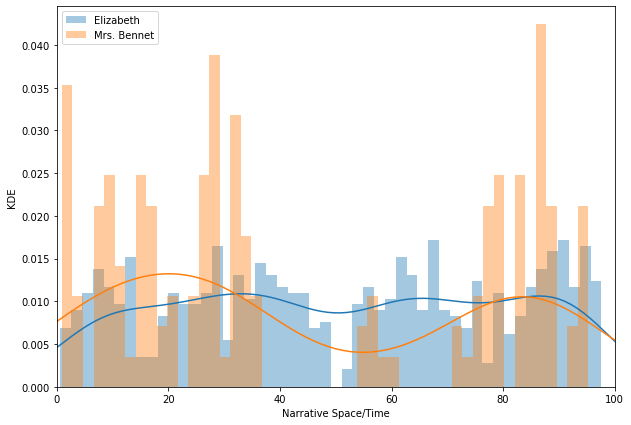

In [148]:
#@title Plotting concepts (example) { form-width: "200px" }

# Here's the plot maker in action:

# First, I make a list of the concepts I made above:

##################################################
############ YOUR INPUT REQUIRED HERE ############
##################################################

concept_list = [elizabeth, mrsbennet]

# This next line does the plotting:

# object_of_interest is whatever you want to plot - a single word, a list of real words,
# a list of concepts.

# Here, it's a list of concepts.
# strategy is the type of thing you gave in object_of_interest. It can be 'concept' or 'word'.

# toplot is the type of plot you get out. The default is 'both'; 
# this gives you a smoothed line plot(that might miss single occurences) 
# as well as a standard histogram - that includes all occurences.

# To just look at the line, say toplot = 'kde'. For just the histogram , say toplot = 'hist'. 

##################################################
############ YOUR INPUT REQUIRED HERE ############
##################################################

plot_word_freq(object_of_interest = concept_list, strategy = 'concept',toplot = 'both')



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

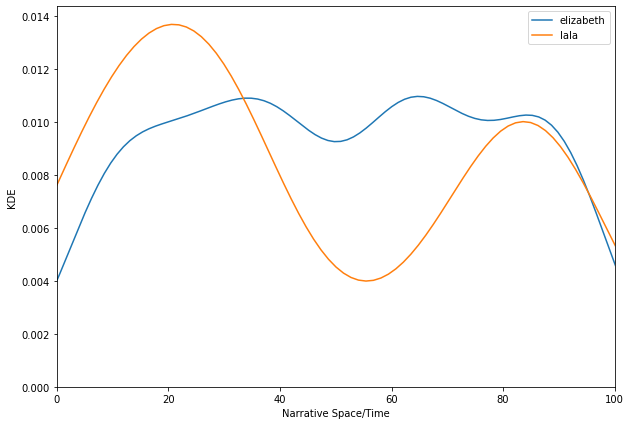

In [149]:
#@title Plotting specific terms (example) { form-width: "200px" }


# To illustrate the range of things this guy can do, I'm going to include the 
# plot for the literal words 'elizabeth' and 'lala'. Above, we used them as concept 
# names  - you'll note I didn't actually include the words themselves
# in my concept_compiler lists.

# This is a list of the literal words 'elizabeth' and 'lala'. 
# Note the difference between this and concept_list.
# The quotation marks are important.
# earlier, we used mrsbennet because we wanted the whole concept. Here, we use
# 'lala' because we are only looking for the times where she was called 'lala'
# (aka Mrs Bennet), and not the times she was called 'mamma'.

literal_word_list = ['elizabeth','lala']

#This time we'll just look at the kde plot
#NOTE: strategy is 'word', here, because we are looking at simple words (not concepts)

plot_word_freq(object_of_interest = literal_word_list, strategy = 'word',toplot = 'kde')
